<a href="https://colab.research.google.com/github/Daisyshi84/BCG_Gamma/blob/main/BCG_Gamma_redo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import packages

1. Loading data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import pickle
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
#Set maximum number of columns to be displayed
pd.set_option('display.max_columns',100)


In [ ]:
#load data
train_data = pd.read_csv("https://raw.githubusercontent.com/Daisyshi84/BCG_Gamma/main/ml_case_training_data.csv") 
churn_data = pd.read_csv("https://raw.githubusercontent.com/Daisyshi84/BCG_Gamma/main/ml_case_training_output.csv") 
history_data = pd.read_csv("https://raw.githubusercontent.com/Daisyshi84/BCG_Gamma/main/ml_case_training_hist_data.csv") 

train_data.head()


,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [ ]:
churn_data.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


Combining two dataframes


In [ ]:
train = pd.merge(train_data,churn_data, on = 'id')
train.rename({'origin_up':'origin'},axis=1)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,2015-05-08,2014-05-26,NaN,NaN,NaN,NaN,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2012-08-27,2015-08-28,68.64,68.64,1254.65,15.94,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,2012-02-08,2015-02-09,NaN,NaN,NaN,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,2012-08-30,2015-08-31,NaN,NaN,NaN,NaN,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


2. General statistics of a dataframe


In [ ]:
pd.DataFrame({"Data type":train.dtypes})

,Datatype
id,object
churn,int64


In [ ]:
pd.DataFrame({"DataType":history_data.dtypes})

,DataType
id,object
price_date,object
price_p1_var,float64
price_p2_var,float64
price_p3_var,float64
price_p1_fix,float64
price_p2_fix,float64
price_p3_fix,float64


Dataframe statistics: Let's also look at the basic statistics of the data




In [ ]:
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


In [ ]:
missing=pd.DataFrame({"missing in %":round(train_data.isnull().sum()/len(train_data*100),2)})
missing


pd.DataFrame({'missing %': round(train.isnull().sum()/len(train)*100,2)})


,missing %
id,0.00
activity_new,59.30
campaign_disc_ele,100.00
channel_sales,26.21
cons_12m,0.00
cons_gas_12m,0.00
cons_last_month,0.00
date_activ,0.00
date_end,0.01
date_first_activ,78.21


Missing Data


In [ ]:
churn_data[churn_data['churn']==0].count()/churn_data[churn_data['churn']==1].count()


id       9.091536
churn    9.091536
dtype: float64

3. Data visualization
Deep diving a little bit on the main parameters


In [ ]:
pd.DataFrame({'Missing values (%)': round(train.isnull().sum()/len(train)*100,2)})


,Missing values (%)
id,0.00
activity_new,59.30
campaign_disc_ele,100.00
channel_sales,26.21
cons_12m,0.00
cons_gas_12m,0.00
cons_last_month,0.00
date_activ,0.00
date_end,0.01
date_first_activ,78.21


**3. Data visualization**

Deep diving a little bit on the main parameters

In [ ]:
churn=train[['id','churn']]
#rename id to 'companies';
churn.columns=['Companies','churn']


In [ ]:
churn_total = churn.groupby(churn['churn']).count()
churn_percentage=churn_total/churn_total.sum()*100

,Companies
churn,
0,90.090706
1,9.909294


In [ ]:
def plot_stacked_bars(datafame, title_, size_=(18, 10), rot_=0, legend_="upper right"): 

  ax = datafame.plot(kind="bar",
                    stacked=True, 
                    figsize=size_, 
                    rot=rot_, 
                    title=title_)
# Annotate bars 
  annotate_stacked_bars(ax, textsize=14) 
# Rename legend
  plt.legend(["Retention", "Churn"], loc=legend_)
# Labels
  plt.ylabel("Company base (%)") 
  plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13): 

# Iterate over the plotted rectanges/bars
  for p in ax.patches:
  # Calculate annotation
    value = str(round(p.get_height(),1))
# If value is 0 do not annotate
    if value == '0.0':
      continue
    ax.annotate(value,
      ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad), color=colour,
        size=textsize,
        )


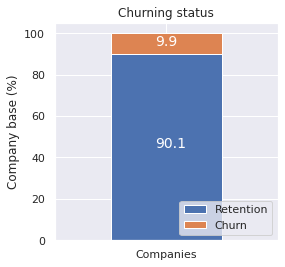

In [ ]:
plot_stacked_bars(churn_percentage.transpose(),"Churning status", (4,4), legend_="lower right")


In [ ]:
def plot_stack_bars(datafame, title, size_, rot_=0, legend_="upper right"): 

  ax = datafame.plot(kind="bar",
                    stacked=False, 
                    figsize=size_, 
                    rot=rot_, 
                    title=title)
# Annotate bars 
  annotate_stacked_bars(ax, textsize=12) 
# Rename legend
  plt.legend(["Retention", "Churn"])
# Labels
  plt.ylabel("Company base (%)") 
  plt.show()

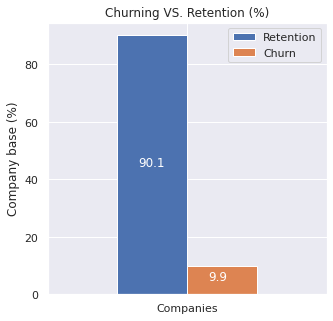

churn,0,1
Companies,90.090706,9.909294


In [ ]:
plot_stack_bars(churn_percentage.transpose(),"Churning VS. Retention (%)",(5,5),legend_="best")
churn_percentage.transpose()



```
SME activity
Let's show the activity distribution of the companies as well as the sales channel.
Intuitively this might be an important predictive feature for energy consumption
```



In [ ]:
activity=train[['id','churn','activity_new']]
activity=activity.groupby([activity['activity_new'],activity['churn']])['id'].count().unstack(level=1).sort_values(by=[0],ascending=False)

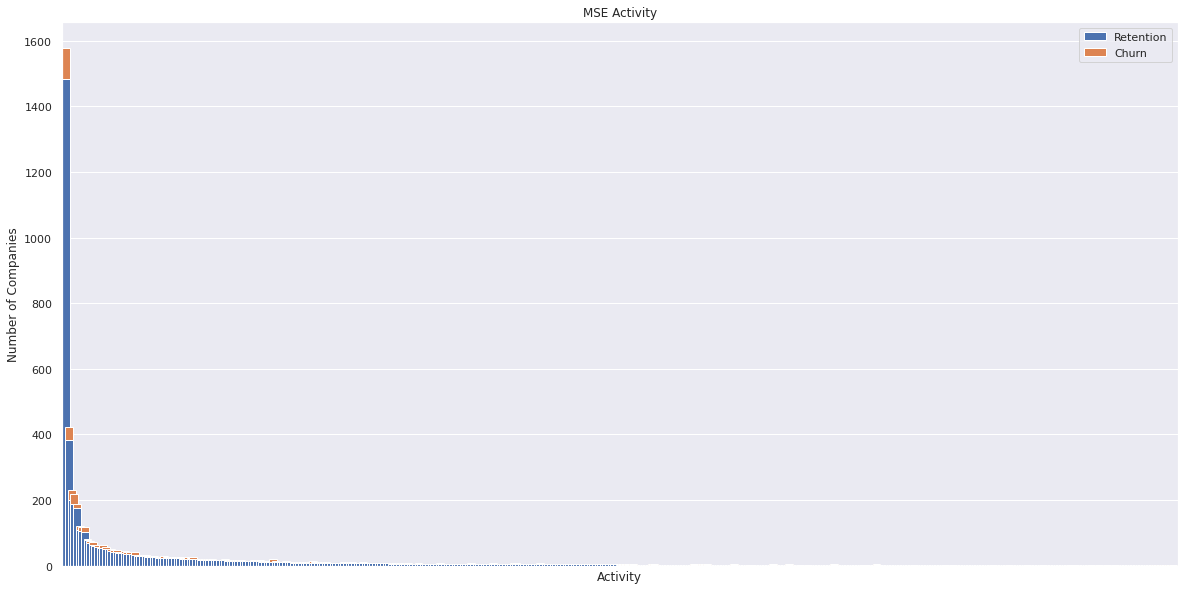

In [ ]:
activity.plot(kind='bar',
              figsize=(20,10),
              width=3,
              stacked='True',
              title='MSE Activity')
plt.ylabel('Number of Companies')
plt.xlabel('Activity')
plt.legend(['Retention','Churn'],loc='upper right')
plt.xticks([])
plt.show()



In [ ]:
contract_type = train[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type["churn"],contract_type["has_gas"]])["id"].count().unstack(level=0)




In [ ]:
contract_percentage = (contract.div(contract.sum(axis=1),axis=0)*100).sort_values(by=[1], ascending=False)
contract_percentage



churn,0,1
has_gas,,
f,89.636004,10.363996
t,92.105263,7.894737


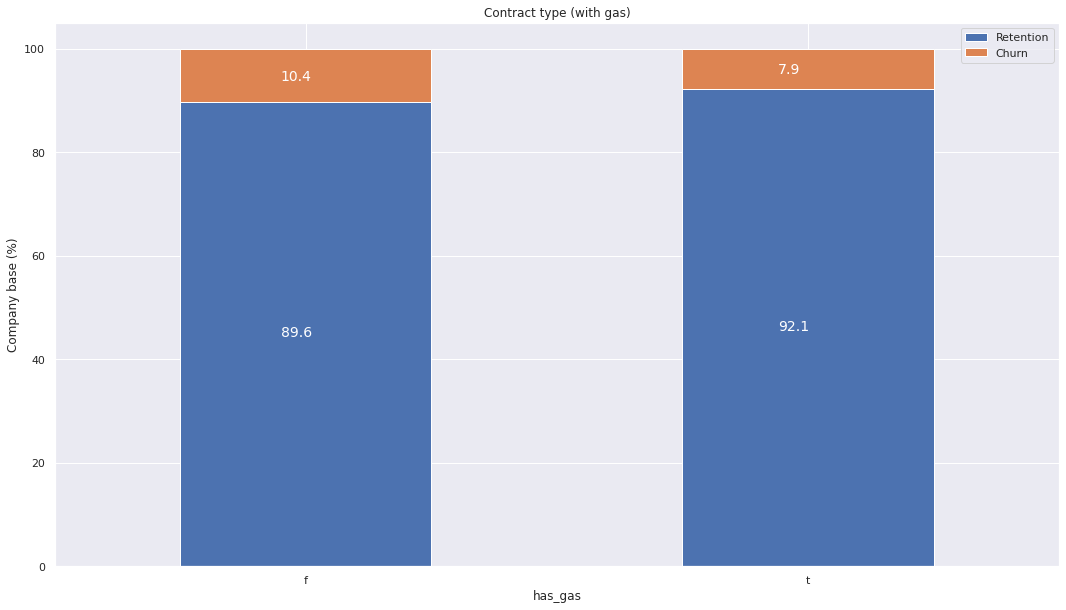

In [ ]:
plot_stacked_bars(contract_percentage, "Contract type (with gas)")
